
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Forside.ipynb" target="_self"> <h2> &uarr; Tilbake til forsiden</h2></a>
    </div>
  </div>
</nav>

# Betingede funksjoner med arrays

**Læringsmål:**

- Betingelser
- For-løkker
- Funksjoner
- Elementvise operasjoner med arrays/lister

### Oppsummering betingede funksjoner

I øving 3 så vi på bruk av if-setinger til å regne på betingede funksjoner (som f.eks. `abs(x)`). I denne oppgaven skal vi se nærmere på bruk av beslutninger på alle elementene i en array.

Først importerer vi biblioteket, `numpy` som vi kommer til å benytte til matematiske beregninger i denne oppgaven. 

In [1]:
import numpy as np

I den matematiske verden er det en rekke funksjoner som har ulike funksjonsuttrykk for ulike input-verdier. Den naturlige logaritmen $ln(x)$ er definert for alle reelle verdier større enn 0. Dette kan skrives som følger:

$ g(x) = \begin{cases} \ln(x), \text{ if } x > 0\\ \text{undef.}, \text{ if } x \leqslant 0 \end{cases}$

I Python kan vi håndtere dette ved å undersøke hvilken input som gis til funksjonen, og returnere den riktige verdien, slik det er gjort i eksempelet nedenfor.

In [2]:
def g(x):
    if x <= 0:
        return float("NaN") # NaN står for "Not A Number", og brukes når resultatet av en utregning er et tall som ikke eksisteres.
    return np.log(x)

In [3]:
# Dersom vi gir en negativ verdi som input, forventer vi tom output
g(-2)

nan

In [4]:
# Dersom vi gir en positiv verdi, forventer vi at denne skal være lik den naturlige logaritmen som output
g(np.e)

np.float64(1.0)

### Betingede funksjoner med array som input

Som kjent er **if**-setninger dårlig egnet til å håndtere arrays, og dersom vi ønsker å regne ut $f(x)$ for alle verdiene i en array må vi benytte en løkke. Nedenfor modifiserer vi funksjonen $f(x)$ slik at den kan brukes med arrays som input.

<!--*PS: koden* `: np.ndarray` *i første linjen er det vi kaller et [type hint](https://www.geeksforgeeks.org/type-hints-in-python/), og der for å fortelle hva slags data som skal sendes til funksjonen `g(x)`. Når man programmerer matematiske uttrykk i python, kan dette være et svært nyttig verktøy for å oppklare hva funksjonen gjør.*-->

In [5]:
def g(x_array):
    y_list = []  # Forbered en tom liste som skal holde alle verdiene y = f(x)
    for x in x_array:
        if x <= 0:
            y = float("NaN")
        else:
            y = np.log(x)
        y_list.append(y)
    return np.array(y_list)

Forklaringen av funksjonens innhold er som følger:
1. Lag en "tom" liste `y_list`. Denne skal etter hvert inneholde funksjonsverdiene $f(x)$ for alle verdiene i `x_array` når løkken er ferdig.
    * Vi bruker en liste og ikke en array for å kunne dra nytte av muligheten til å legge til elementer underveis.
3. Begynn en for-løkke som itererer over alle elementer i arrayen `x_array`. 
    * For hver av verdiene `x`, finner vi den riktige utgangsverdien `y` med samme if-setning som tidligere.
    * Vi skal dog ikke returnere utregnede verdier `y`, men istedenfor skrive de til listen vi lagde i steg 1.
4. Returner til slutt hele listen `y_list` konvertert til en numpy-array.

## a)

Det er fortsatt en dårlig idé å dele på 0 i matematikken. I denne oppgaven skal du implementere en funksjon som genererer riktig output for den matematiske funksjonen $f(x)$ for alle verdier av $x$, der $f(x) = 1$ når $x = 0$:

$$f(x) = \frac{\sin(x)}{x}$$


In [8]:
def f(x_array):
    y_list = []
    for x in x_array:
        if x == 0:
            y = 1
        else:
            y = np.sin(x)/x
        y_list.append(y)
    return np.array(y_list)

Vi kan teste ut funksjonen med et par ulike arrays som input:

In [9]:
testArray1 = np.array([-1, 0, 1])
print(f"f({testArray1}) = {f(testArray1)}")
testArray2 = np.array([-5, -1, 3])
print(f"f({testArray2}) = {f(testArray2)}")
# Denne cellen brukes under retting. La stå!

f([-1  0  1]) = [0.84147098 1.         0.84147098]
f([-5 -1  3]) = [-0.19178485  0.84147098  0.04704   ]


Har du løst oppgaven riktig skal utskriften være:\
`f([-1  0  1]) = [0.84147098 1.         0.84147098]`\
`f([-5 -1  3]) = [-0.19178485  0.84147098  0.04704   ]`

## b)

#### Beregning av en fallskjermhoppers hastighet

I denne oppgaven skal det implementeres en funksjon for å returnere hastigheten til en fallskjermhopper før fallskjermen utløses som en funksjon av hvor lenge det er siden hopperen forlot flyet. Vi antar at det er to tilfeller:

1. Perioden før hopperen når sin terminalfart
2. Perioden når hopperen beveger seg i terminalfart

**Perioden før terminalfart:**
Ved $t=0$ antar vi at farten er 0. Deretter er det en lineær sammenheng mellom tiden og hastigheten, denne sammenhengen er gitt ved forenklede ligningen:

$ v(t) = t \cdot g$

Der $g \approx 9.81$ er tyngdeakselerasjonen og $t$ er tiden siden hoppet startet.

**Perioden etter terminalhastighet er oppnådd:**
For enkelhets skyld antar vi at alle hoppere, uavhengig av vekt, oppnår terminalhastighet etter like lang tid, nemlig etter $t=10$. Hastigheten til hopperen etter dette er tidsuavhengig, og er gitt ved ligningen:

$v_{terminal} = 10 \cdot g$

Du skal skrive en funksjon som tar inn en array med tidspunkt, og returnerer hastigheten til hopperen på de ulike tidspunktene.

**Skriv koden din her:**

In [11]:
def hastighet(tid):
    g = 9.81
    v_list = []
    for t in tid:
        if t < 10:
            v = t * g
        else:
            v = 10 * g
        v_list.append(v)
    return np.array(v_list)

Vi kan lage et plot av hastighet over tid for å sjekke at funksjonen fungerer slik den skal:

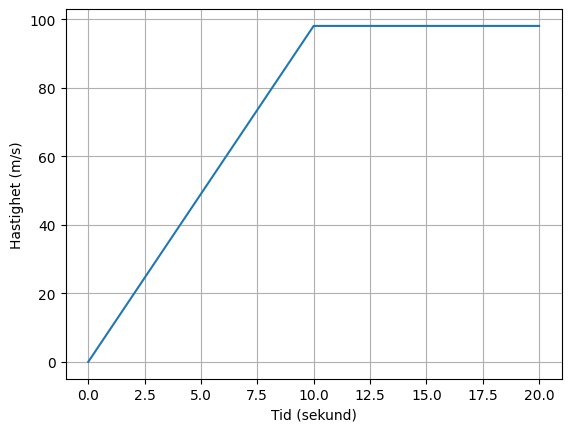

In [12]:
t = np.linspace(0, 20, 501)
import matplotlib.pyplot as plt
plt.plot(t, hastighet(t))
plt.xlabel("Tid (sekund)")
plt.ylabel("Hastighet (m/s)")
plt.grid(True)

[her](Figurer/fallskjermhopper.png) kan du se hvordan plottet skal se ut.

### Noen refleksjoner rundt lesbar kode og matematikk

Når man skriver python-kode som utfører en matematisk beregning, er det veldig vanlig å bruke matematisk notasjon for variabelnavn/funksjonsnavn. Selv om dette gir mening rent faglig, kan det gjøre koden vanskelig å få oversikt over, da det er litt mindre selvforklarende hva en funksjon skal gjøre. Heldigvis finnes det noen ting vi kan gjøre for å rette opp i dette.

#### [Type Hints:](https://www.geeksforgeeks.org/type-hints-in-python/)
Når vi skriver en funksjonsbeskrivelse er det mulig å spesifisere hvilken datatype funksjonen forventer som input, og hva som returneres. For eksempel, kan en funksjon `f` som fegner ut $\frac{\sin(x)}{x}$ slik som i deloppgave **a)** startes med:
```Python
def f(x: np.ndarray) -> np.ndarray:
```
Her sier vi at funksjonen `f` tar inn én parameter `x`, og forventer at `x` er av typen [`np.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (vanlig numpy-array) basert på den påfølgende koden `: np.ndarray`. Videre forteller vi også at *returverdien* fra funksjonen også er en array med koden `-> np.ndarray`. På denne måten vil noen som ser funksjonsbeskrivelsen av `f` lett kunne se at for å bruke funksjonen riktig må de sende en array som input, og behandle returverdien de får tilbake som en array.

#### [Docstrings:](https://www.geeksforgeeks.org/python-docstrings/)
Dersom vi lager en streng med triple hermetegn, kan den brukes som en *dokumentasjon* for en funksjon. Her kan man fortelle med ord hva det er funksjonen gjør:

```Python
def f(x: np.ndarray) -> np.ndarray:
    """
    Regner ut funksjonen f(x) = sin(x)/x, og bruker kjente grenseverdier for å
    evaluere spesialtilfellet sin(0)/0 som 1.

    Parametre:
    x - en array med tallverdier

    Returnerer:
    y - en array med funksjonsverdier f(x) for input-verdiene gitt i x
    """
    # Selve funksjonskoden kommer her!
    return y
```

Det som er gunstig med å skrive funksjoner på denne måten, er at dersom man senere skal bruke funskjonen `f`, kan man hente opp dokumentasjonen (ved å trykke  `shift` + `tab` på windows), og da vil man få opp dokumentasjonen som er skrevet i for funksjonen i et lite popup-vindu (nøyaktig funksjonalitet vil avhenge litt av programmeringsmiljø). Prøv ut eksempelet nedenfor:

In [18]:
def f(x: np.ndarray) -> np.ndarray:
    """
    Regner ut funksjonen f(x) = sin(x)/x, og bruker kjente grenseverdier for å
    evaluere spesialtilfellet sin(0)/0 som 1.

    Parametre:
    x - en array med tallverdier

    Returnerer:
    y - en array med funksjonsverdier f(x) for input-verdiene gitt i x
    """
    # Selve funksjonskoden kommer her!
    return y
f # Kjør ellen, så sett musemarkøren på funksjonsnavnet og trykk shift+tab!

<function __main__.f(x: numpy.ndarray) -> numpy.ndarray>

<br>
<nav class="navbar navbar-default">
        <div class="container-fluid">
            <div class="navbar-header" style="float: left">
                <a class="navbar-brand" href="3_Nedbetaling_av_laan.ipynb" target="_self">&lt; Forrige side: <i>nedbetaling av lån</i></a>
                </div>
            <div class="navbar-header" style="float: right">
                <a class="navbar-brand" href="5_matriser_intro.ipynb" target="_self">Neste side: <i>intro til matriser</i> &gt;</a>
            </div>
        </div>
</nav>